<a href="https://colab.research.google.com/github/carbotton/ML_Notebooks/blob/main/unsupervised_learning/customer_purchase_records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group unlabeled customer purchase records into segments

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python



# Dataset

In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [3]:
import os
import pandas as pd

files = [f for f in os.listdir(path) if f.lower().endswith('.csv')]
csv_file = os.path.join(path, files[0])

columns = ["CustomerID","Gender","Age","AnnualIncome","SpendingScore"]
df = pd.read_csv(csv_file, header=0, names=columns)
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
print(f"CustomerID {df['CustomerID'].unique()}")
print(f"Gender {df['Gender'].unique()}")
print(f"Age {df['Age'].unique()}")
print(f"AnnualIncome {df['AnnualIncome'].unique()}")
print(f"SpendingScore {df['SpendingScore'].unique()}")

CustomerID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
Gender ['Male' 'Female']
Age [19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 

In [5]:
df['GenderNum'] = df['Gender'].map({'Female': 0, 'Male': 1})
df = df.drop(columns=['Gender'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     200 non-null    int64
 1   Age            200 non-null    int64
 2   AnnualIncome   200 non-null    int64
 3   SpendingScore  200 non-null    int64
 4   GenderNum      200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [7]:
df.shape

(200, 5)

In [8]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,GenderNum
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.440000
std,57.879185,13.969007,26.264721,25.823522,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000


In [9]:
df = df.drop(columns=['CustomerID'])

## Plots

### Pair plot

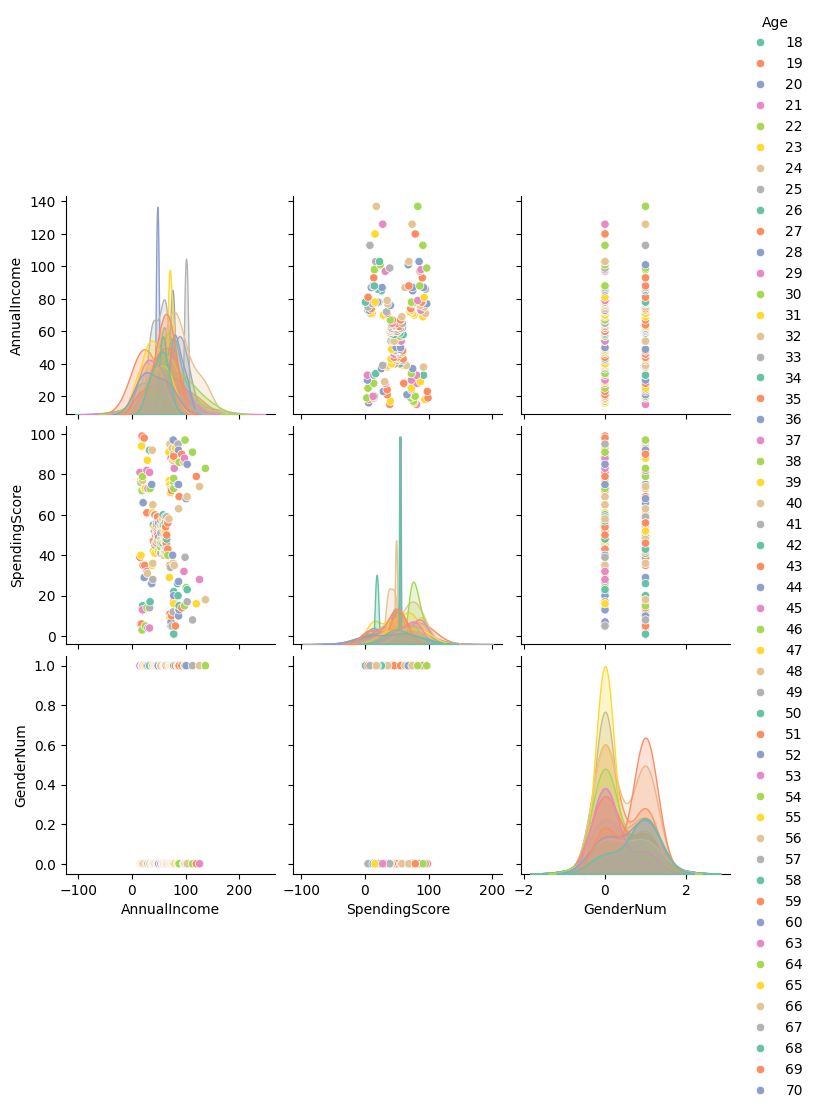

In [10]:
import seaborn as sns

sns.pairplot(df,hue='Age', palette='Set2')

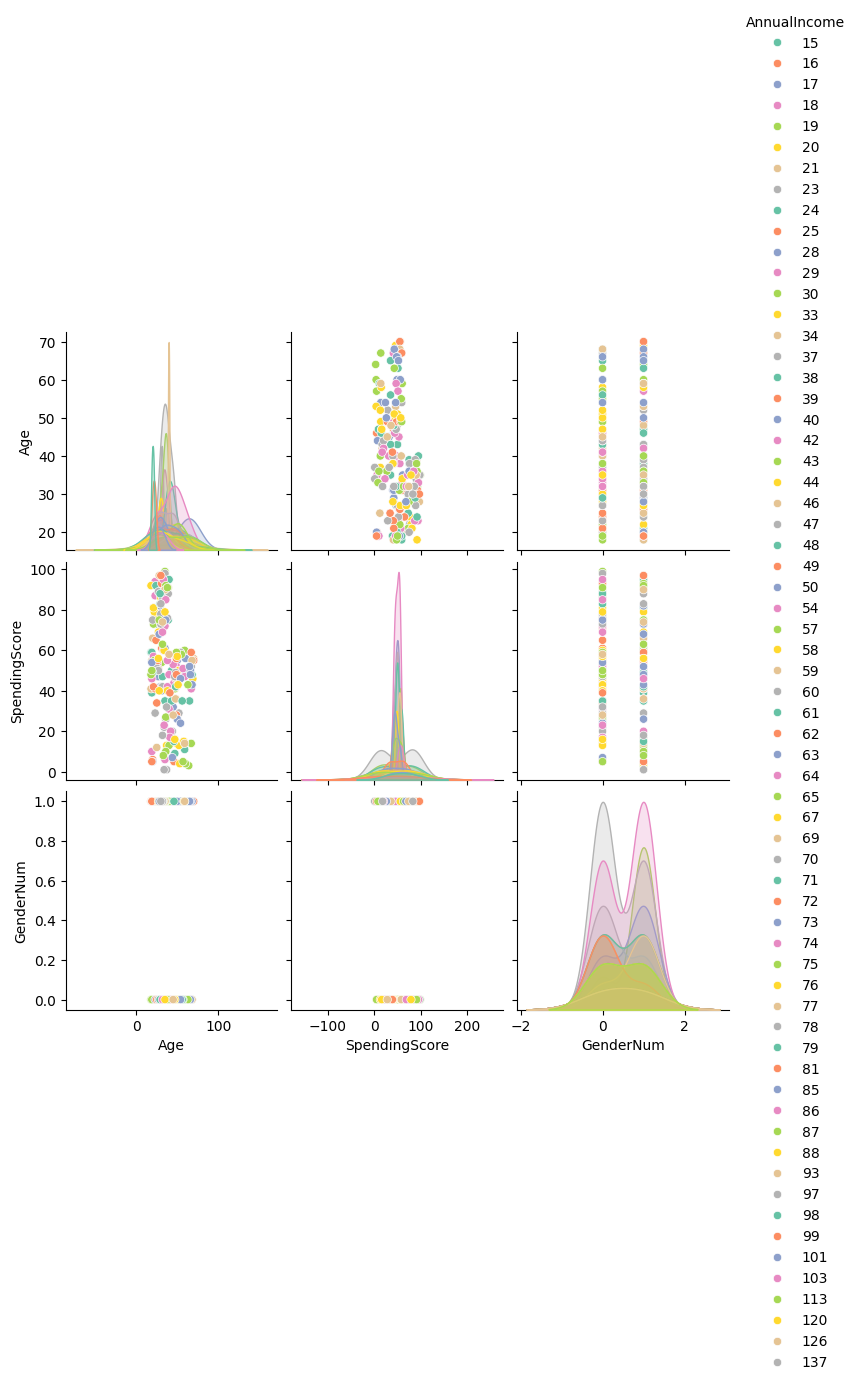

In [11]:
import seaborn as sns

sns.pairplot(df,hue='AnnualIncome', palette='Set2')

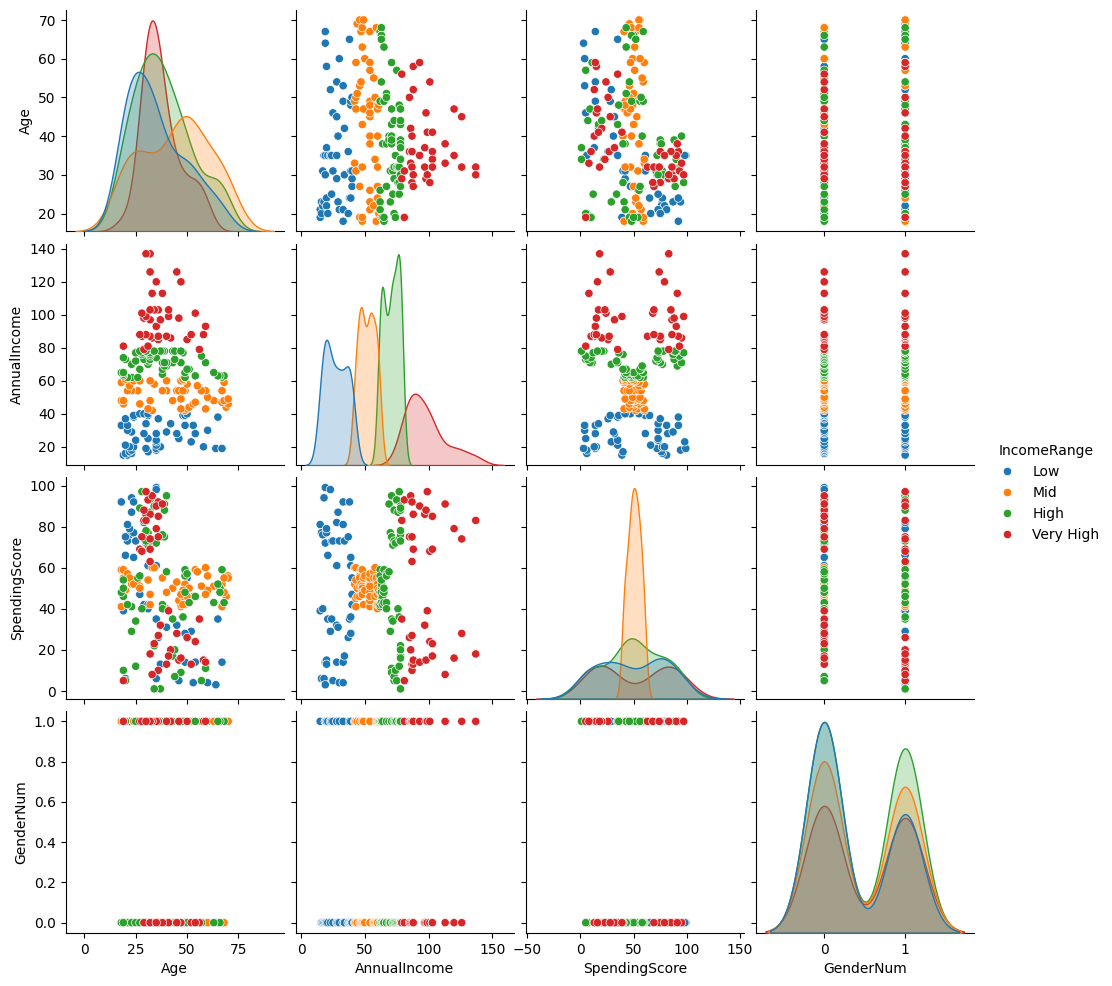

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define bins (here using quartiles)
df['IncomeRange'] = pd.qcut(
    df['AnnualIncome'],
    q=4,
    labels=['Low','Mid','High','Very High']
)

# 2. Pair‐plot with categorical hue
sns.pairplot(
    df,
    vars=['Age','AnnualIncome','SpendingScore', 'GenderNum'],
    hue='IncomeRange',
    palette='tab10'
)
plt.show()


### Histograms

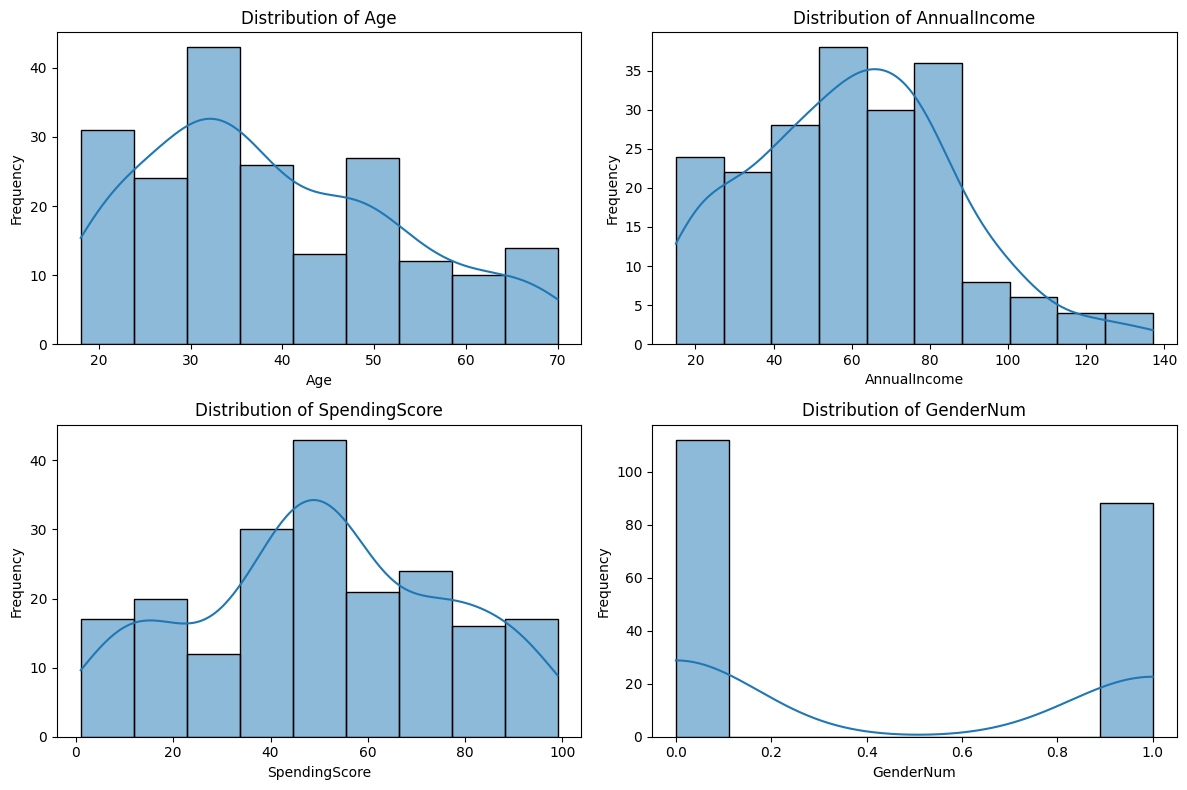

In [13]:
import matplotlib.pyplot as plt

# Select only numerical columns for plotting histograms
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows and columns for subplots
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Boxplots

Metric scale level data (age, salary, temperature...)

Info: median, interquartile, outliers

The box indicates the range in which the middle 50% of all data lies.
=>

The lower end of the box is the 1st quartile and the upper end is the 3rd quartile.

25% of data is below q1 and 25% above q3.

q1 < interquartile range < q3

solid line = median

dashed line = mean

T-shaped whiskers: go to the last point, which is still within 1.5 times the interquartile range

The top T can go to the max or, if you have outliers, it goes to 1.5 of the interquartile.




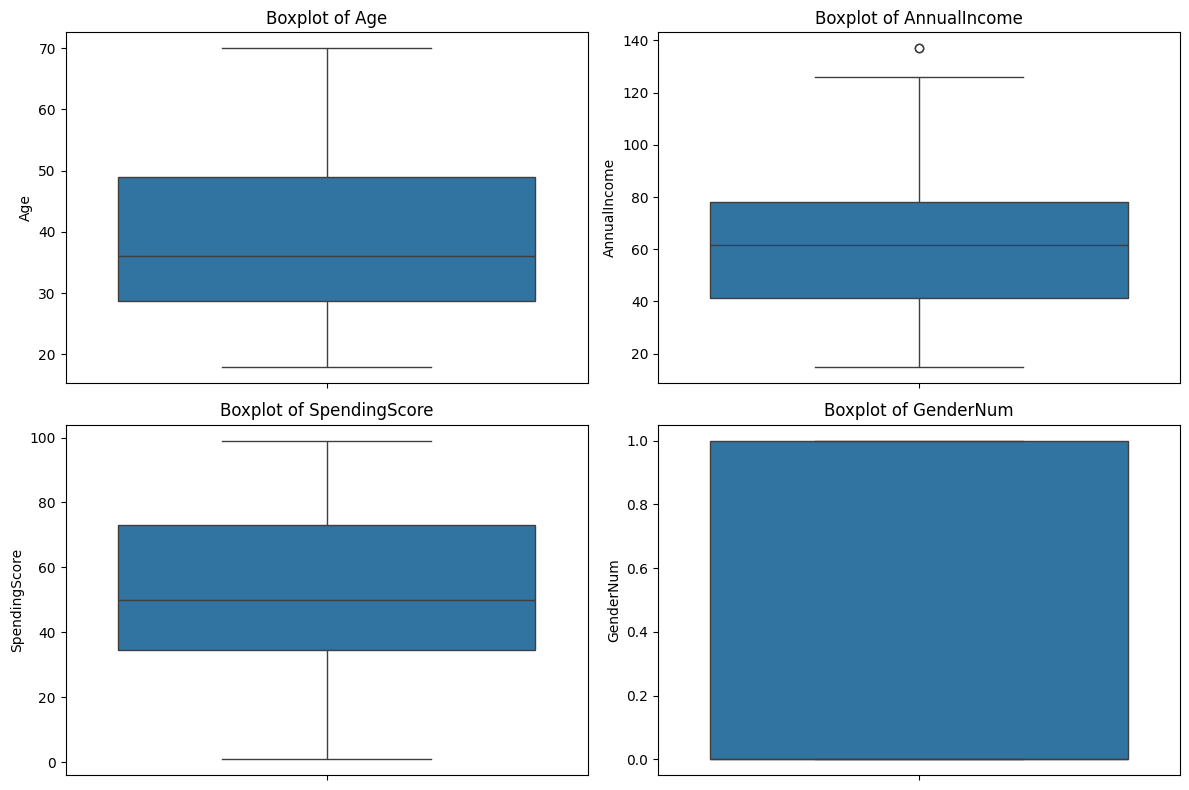

In [14]:
# prompt: boxplots for all features

import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows and columns for subplots
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
  sns.boxplot(y=df[col], ax=axes[i])
  axes[i].set_title(f'Boxplot of {col}')
  axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correlation Matrix Heatmap

We usually drop a feature that has a high correlation with another because they carry redundant information.

By dropping this cases we reduce overfitting risk, simplify the model and improve interpretability.

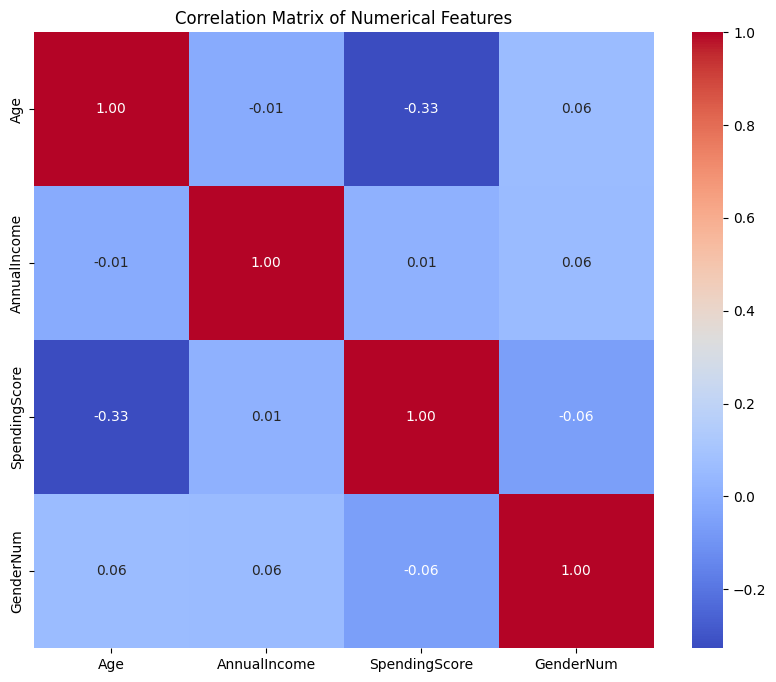

In [15]:
# prompt: Correlation Matrix Heatmap

import matplotlib.pyplot as plt
# ### Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Hex Bin plot

Represent relationship between 2 numerical variables.

They divide the plotting area into hexagonal cells and then color each hexagon based on the number of data points it contains.

Darker color = higher data density


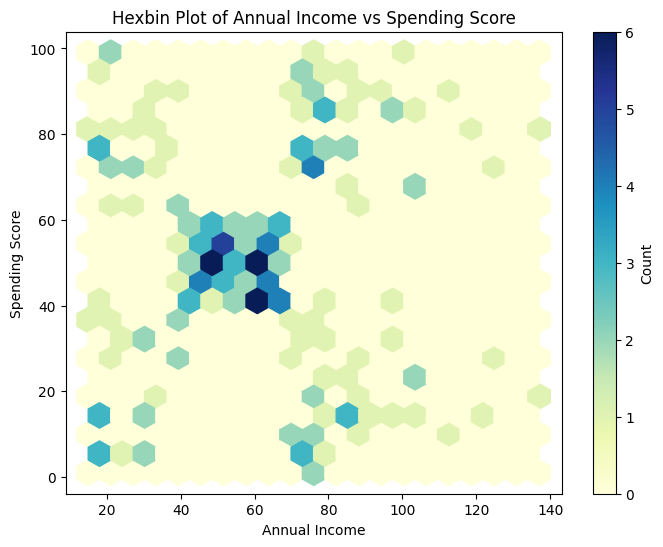

In [16]:
# prompt: Jointplot / Hexbin / Contour

import matplotlib.pyplot as plt
# Hexbin plot of Annual Income vs Spending Score
plt.figure(figsize=(8, 6))
plt.hexbin(df['AnnualIncome'], df['SpendingScore'], gridsize=20, cmap='YlGnBu')
plt.colorbar(label='Count')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Hexbin Plot of Annual Income vs Spending Score')
plt.show()

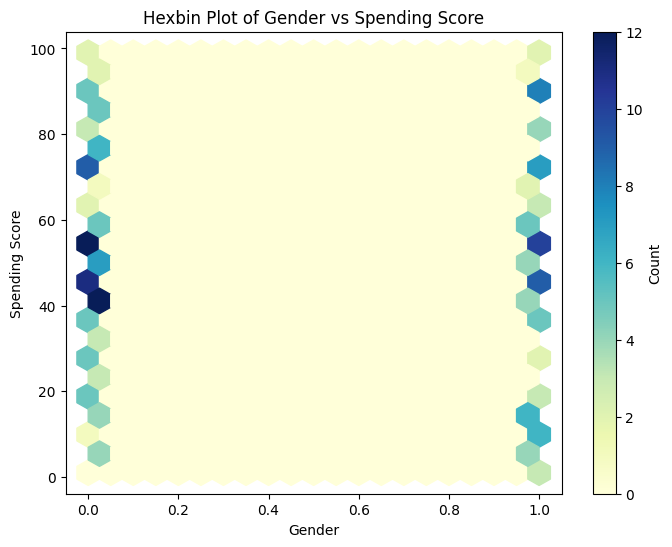

In [17]:
# Hexbin plot of Gender vs Spending Score
# 0: female ; 1: male
plt.figure(figsize=(8, 6))
plt.hexbin(df['GenderNum'], df['SpendingScore'], gridsize=20, cmap='YlGnBu')
plt.colorbar(label='Count')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Hexbin Plot of Gender vs Spending Score')
plt.show()

### Contour plot

Cada contorno conecta puntos con la misma densidad de datos.

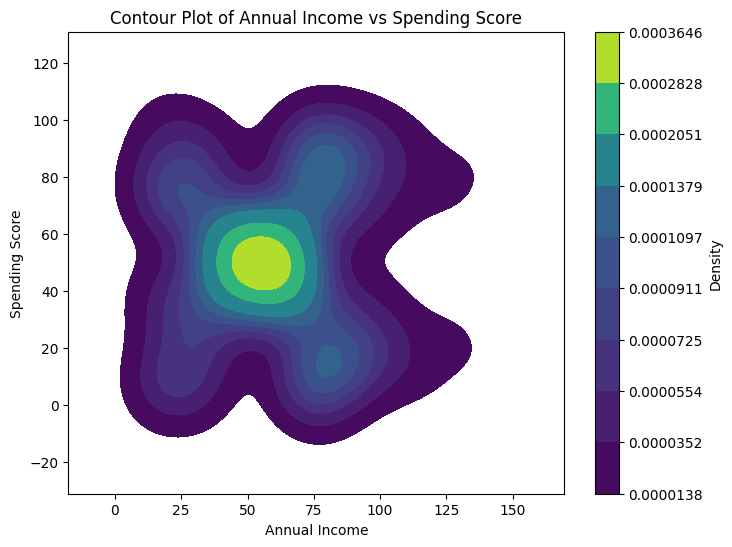

In [19]:
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(x=df['AnnualIncome'], y=df['SpendingScore'], fill=True, cmap='viridis')
plt.colorbar(ax.collections[0], label='Density')  # Agrega la barra de colores
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Contour Plot of Annual Income vs Spending Score')
plt.show()

Se observa que se forman clusters naturales, los datos no estan distribuidos uniformemente.
Puede servir K-means.

La mayor concentracion de clientes se da en los que tienen un spending score entre 40 y 70, y ganan entre 45 y 75 K anuales.

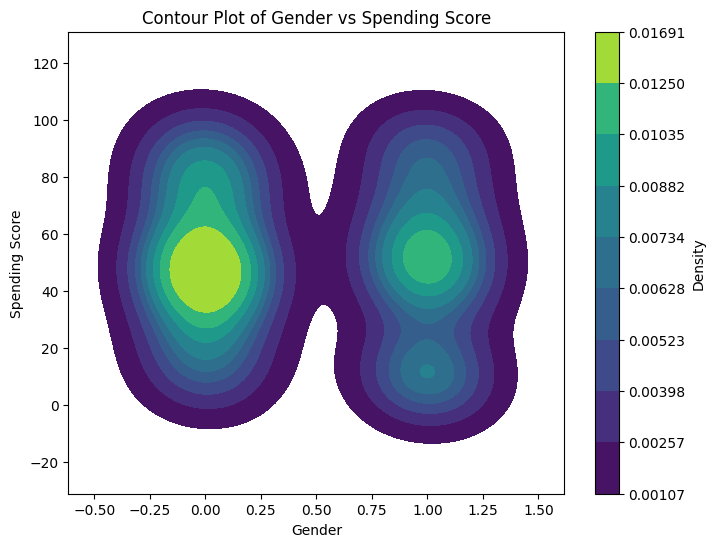

In [21]:
# Contour plot of Gender vs Spending Score
plt.figure(figsize=(8, 6))
bx = sns.kdeplot(x=df['GenderNum'], y=df['SpendingScore'], fill=True, cmap='viridis')
plt.colorbar(bx.collections[0], label='Density')  # Agrega la barra de colores
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Contour Plot of Gender vs Spending Score')
plt.show()

Para el spending score de entre 35 y 60 tenemos la mayoria de los datos y dentro de estos, hay mayor concentracion de mujeres.

Para los hombres se ve que la mayoria está tambien entre 35 y 60 y hay otro pequeño grupo concentrado cerca de 20.

### Jointplot

Scatter plot: cada punto es 1 cliente

Histogramas: distribuciones de AnnualIncome y SpendingScore.

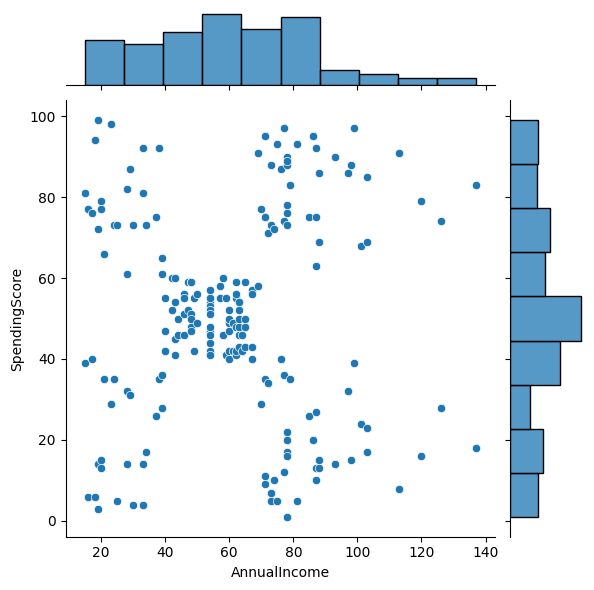

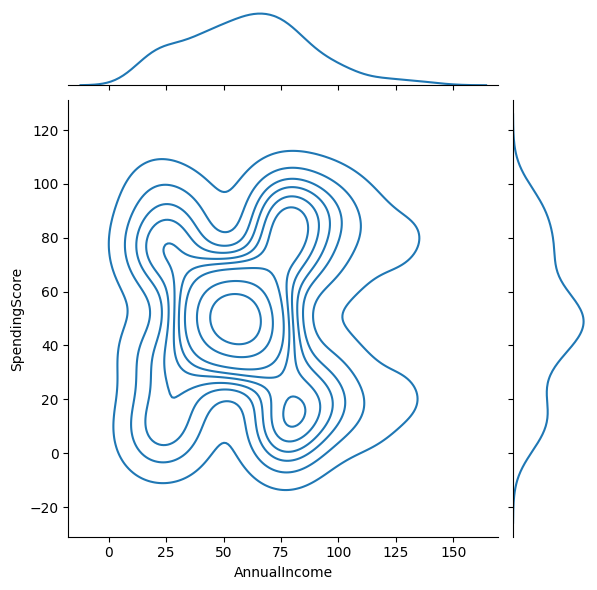

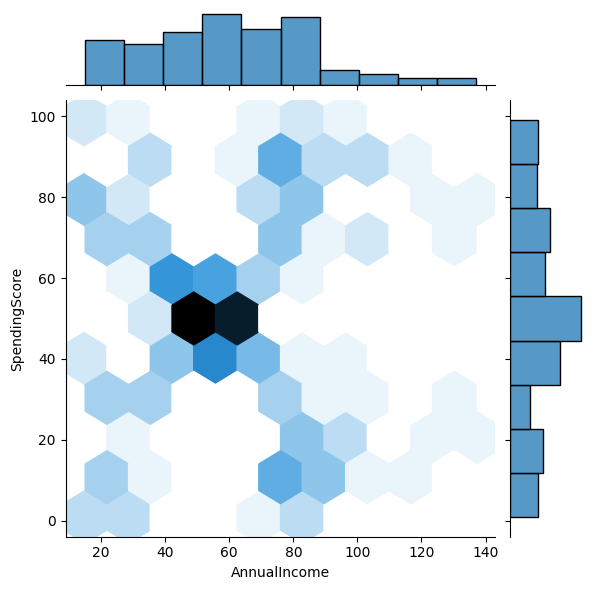

In [ ]:
# Jointplot of Annual Income vs Spending Score
sns.jointplot(x='AnnualIncome', y='SpendingScore', data=df, kind='scatter')
plt.show()

sns.jointplot(x='AnnualIncome', y='SpendingScore', data=df, kind='kde')
plt.show()

sns.jointplot(x='AnnualIncome', y='SpendingScore', data=df, kind='hex')
plt.show()

Se identifican 5 grupos de clientes mirando el scatter plot.

Se podria probar K-means con k = 5

# K-Means

In [24]:
from sklearn.preprocessing import StandardScaler

features = ['Age', 'AnnualIncome', 'SpendingScore', 'GenderNum']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## k = 5

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

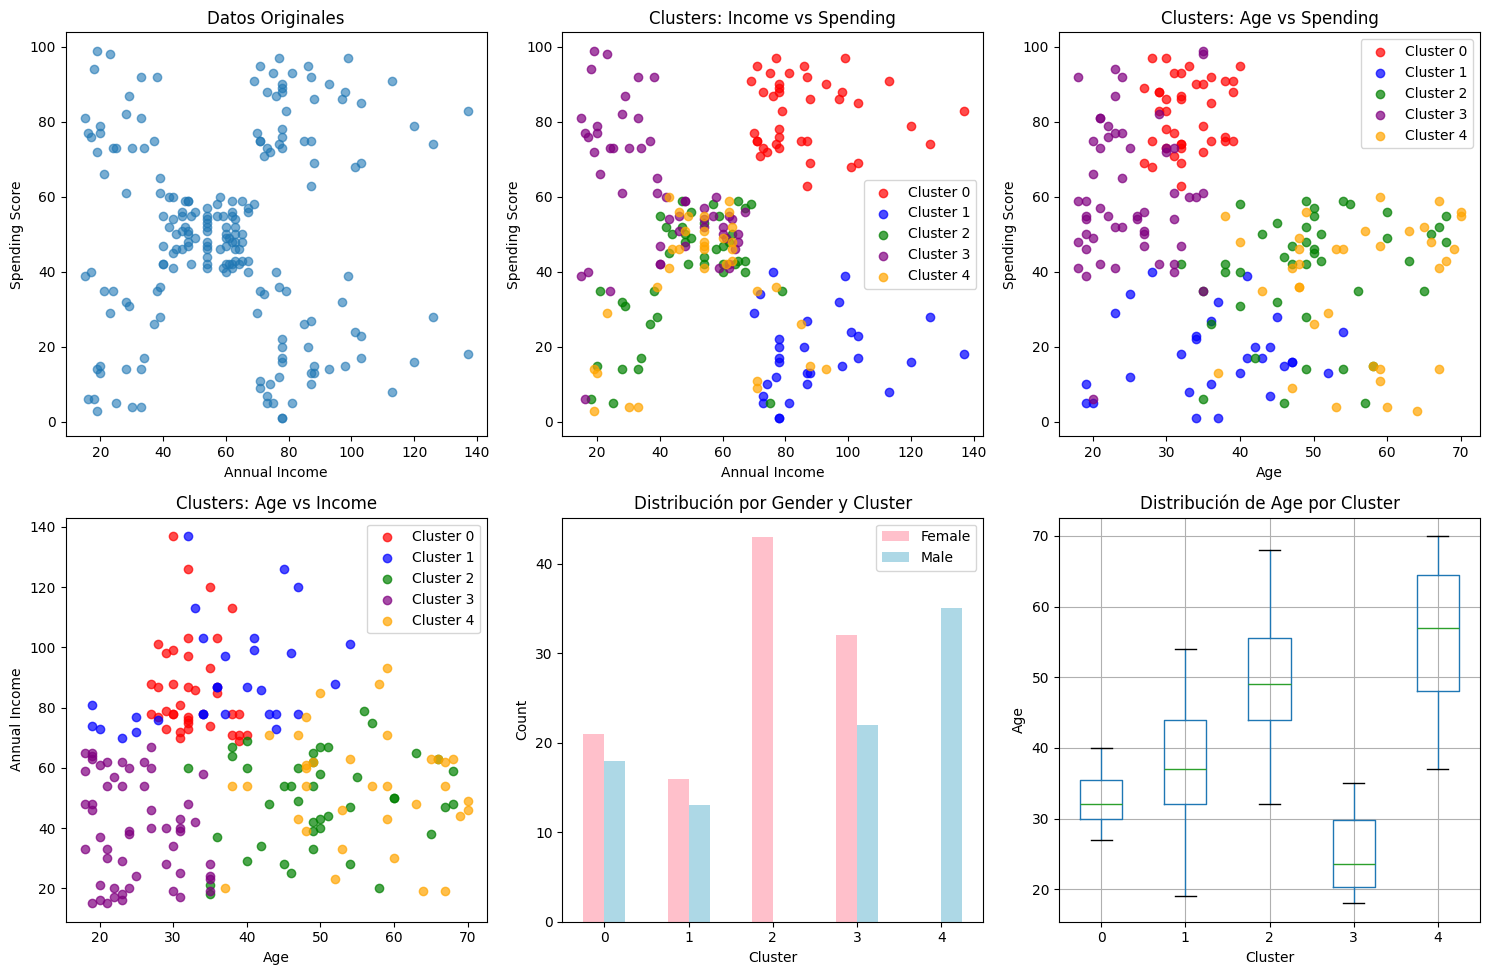

In [28]:
# Visualizar los resultados
plt.figure(figsize=(15, 10))

# Subplot 1: Income vs Spending Score
plt.subplot(2, 3, 1)
plt.scatter(df['AnnualIncome'], df['SpendingScore'], alpha=0.6)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Datos Originales')

# Subplot 2: Income vs Spending Score con clusters
plt.subplot(2, 3, 2)
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['AnnualIncome'], cluster_data['SpendingScore'],
                c=colors[i], label=f'Cluster {i}', alpha=0.7)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters: Income vs Spending')
plt.legend()

# Subplot 3: Age vs Spending Score con clusters
plt.subplot(2, 3, 3)
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['SpendingScore'],
                c=colors[i], label=f'Cluster {i}', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Clusters: Age vs Spending')
plt.legend()

# Subplot 4: Age vs Income con clusters
plt.subplot(2, 3, 4)
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['AnnualIncome'],
                c=colors[i], label=f'Cluster {i}', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Clusters: Age vs Income')
plt.legend()

# Subplot 5: Distribución por Gender y Cluster
plt.subplot(2, 3, 5)
gender_cluster = df.groupby(['Cluster', 'GenderNum']).size().unstack(fill_value=0)
gender_cluster.plot(kind='bar', ax=plt.gca(), color=['pink', 'lightblue'])
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribución por Gender y Cluster')
plt.xticks(rotation=0)
plt.legend(['Female', 'Male'])

# Subplot 6: Box plot de Age por Cluster
plt.subplot(2, 3, 6)
df.boxplot(column='Age', by='Cluster', ax=plt.gca())
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Distribución de Age por Cluster')
plt.suptitle('')  # Quitar título automático

plt.tight_layout()
plt.show()

**Cluster 0 (Rojo) - "Jóvenes Gastadores"**

Edad: 25-35 años

Income: Alto (80-120)

Spending: Alto (75-95)

Perfil: Jóvenes profesionales con buenos ingresos que gastan mucho

**Cluster 1 (Azul) - "Jóvenes con plata que gastan poco"**

**Cluster 2 (Verde) - "Adultos que ni ganan ni gastan mucho "**

**Cluster 3 (Violeta) - "Jóvenes de bajos ingresos"**

**Cluster 4 (Amarillo) - "Adultos mas mayores que ni ganan ni gastan mucho"**


In [33]:
# Información sobre los clusters
print("Información de los clusters:")
print(f"Número total de clientes: {len(df)}")
print("\nTamaño de cada cluster:")
print(df['Cluster'].value_counts().sort_index())

print("\nCentroides de cada cluster (valores originales):")
centroids_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                           columns=['Age', 'AnnualIncome', 'SpendingScore', 'Gender_encoded'])
centroids_df.index = [f'Cluster {i}' for i in range(5)]
print(centroids_df.round(2))

# Estadísticas descriptivas por cluster
print("\nEstadísticas por cluster:")
cluster_stats = df.groupby('Cluster')[['Age', 'AnnualIncome', 'SpendingScore']].agg(['mean', 'std', 'count']).round(2)
print(cluster_stats)

Información de los clusters:
Número total de clientes: 200

Tamaño de cada cluster:
Cluster
0    39
1    29
2    43
3    54
4    35
Name: count, dtype: int64

Centroides de cada cluster (valores originales):
             Age  AnnualIncome  SpendingScore  Gender_encoded
Cluster 0  32.69         86.54          82.13            0.46
Cluster 1  36.48         89.52          18.00            0.45
Cluster 2  49.81         49.23          40.07           -0.00
Cluster 3  24.91         39.72          61.20            0.41
Cluster 4  55.71         53.69          36.77            1.00

Estadísticas por cluster:
           Age             AnnualIncome              SpendingScore         \
          mean   std count         mean    std count          mean    std   
Cluster                                                                     
0        32.69  3.73    39        86.54  16.31    39         82.13   9.36   
1        36.48  9.68    29        89.52  17.42    29         18.00  10.58   
2       

## Encontrar K optimo

### Elbow method

Qué mide: Reducción de la varianza intra-cluster (inertia)

Cómo funciona: Busca el punto donde la mejora se ralentiza (el "codo")

In [41]:
def elbow_method(X_scaled, max_k=10):
    """Encuentra el k óptimo usando el método del codo"""
    inertias = []
    k_range = range(1, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)

    return k_range, inertias

k_range_elbow, inertias = elbow_method(X_scaled, max_k=10)
print(k_range_elbow, inertias)

range(1, 11) [800.0000000000003, 588.8026767824932, 476.78755441351575, 388.7178614053844, 331.3098837641085, 276.4117595313096, 236.20494707086885, 199.75046112065573, 174.23547730691482, 152.02983429775693]


### Silhouette method

Qué mide: Qué tan bien separados están los clusters
Rango: -1 a 1 (más alto = mejor)

Cómo funciona: Compara distancia intra-cluster vs inter-cluster

In [36]:
from sklearn.metrics import silhouette_score

def silhouette_method(X_scaled, max_k=10):
    """Encuentra el k óptimo usando silhouette score"""
    silhouette_scores = []
    k_range = range(2, max_k + 1)  # Silhouette necesita al menos 2 clusters

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    return k_range, silhouette_scores

k_range_silhouette, silhouette_scores = silhouette_method(X_scaled, max_k=10)
print(k_range_silhouette, silhouette_scores)

range(2, 11) [np.float64(0.2518152915788437), np.float64(0.25951265087431563), np.float64(0.2983972818544038), np.float64(0.3040600988258827), np.float64(0.33107393337175933), np.float64(0.3573771582429211), np.float64(0.3879927454351689), np.float64(0.40309165116555223), np.float64(0.42076374869477745)]


In [40]:
best_k_silhouette = k_range_silhouette[np.argmax(silhouette_scores)]
max_silhouette = max(silhouette_scores)
print(f"El k óptimo es {best_k_silhouette} con un score de {max_silhouette}")

El k óptimo es 10 con un score de 0.42076374869477745


### Gap statistic

Qué mide: Compara tu clustering vs datos aleatorios

Cómo funciona: Si tus datos tienen estructura real, gap será alto

In [39]:
import numpy as np

def gap_statistic(X_scaled, max_k=10, n_refs=10):
    """Calcula Gap Statistic para encontrar k óptimo"""
    gaps = []
    k_range = range(1, max_k + 1)

    for k in k_range:
        # Clustering en datos reales
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        real_inertia = kmeans.inertia_

        # Clustering en datos aleatorios de referencia
        ref_inertias = []
        for _ in range(n_refs):
            # Generar datos aleatorios con la misma forma
            random_data = np.random.random_sample(size=X_scaled.shape)
            kmeans_ref = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans_ref.fit(random_data)
            ref_inertias.append(kmeans_ref.inertia_)

        # Calcular gap
        gap = np.log(np.mean(ref_inertias)) - np.log(real_inertia)
        gaps.append(gap)

    return k_range, gaps

k_range_gap, gaps = gap_statistic(X_scaled, max_k=10)
print(k_range_gap, gaps)


range(1, 11) [np.float64(-2.4943080895569754), np.float64(-2.4262765859895583), np.float64(-2.3938128400071887), np.float64(-2.366054135084873), np.float64(-2.3395267365685264), np.float64(-2.273550900963733), np.float64(-2.2233995253973964), np.float64(-2.1574686338111455), np.float64(-2.1184814915991304), np.float64(-2.045570343897385)]


### K optimo segun cada metodo

In [42]:
# ELBOW METHOD - Encontrar k óptimo
def find_elbow_k(inertias):
    """Encuentra k óptimo usando el método del codo automáticamente"""
    # Calcular diferencias de segundo orden
    diffs = np.diff(inertias)
    diffs2 = np.diff(diffs)
    # El codo está donde la segunda derivada es máxima
    elbow_k = np.argmax(diffs2) + 2  # +2 porque perdimos 2 índices con diff
    return elbow_k

# SILHOUETTE SCORE - Encontrar k óptimo
def find_silhouette_k(silhouette_scores, k_range):
    """Encuentra k óptimo con silhouette score"""
    best_k = k_range[np.argmax(silhouette_scores)]
    return best_k

# GAP STATISTIC - Encontrar k óptimo
def find_gap_k(gaps):
    """Encuentra k óptimo usando gap statistic"""
    best_k = np.argmax(gaps) + 1  # +1 porque k_range empieza en 1
    return best_k

# Ejecutar y obtener k óptimo para cada método
optimal_k_elbow = find_elbow_k(inertias)
optimal_k_silhouette = find_silhouette_k(silhouette_scores, k_range_silhouette)
optimal_k_gap = find_gap_k(gaps)

print(f"K óptimo - Elbow Method: {optimal_k_elbow}")
print(f"K óptimo - Silhouette Score: {optimal_k_silhouette}")
print(f"K óptimo - Gap Statistic: {optimal_k_gap}")

K óptimo - Elbow Method: 2
K óptimo - Silhouette Score: 10
K óptimo - Gap Statistic: 10


### Analisis mas acotado, max k = 6

In [44]:
# Evalúa con un rango más conservador
k_range_silhouette, silhouette_scores = silhouette_method(X_scaled, max_k=6)
optimal_k_silhouette = find_silhouette_k(silhouette_scores, k_range_silhouette)

print(f"K óptimo - Silhouette Score: {optimal_k_silhouette}")

K óptimo - Silhouette Score: 6


## k = 6

In [47]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster2'] = clusters

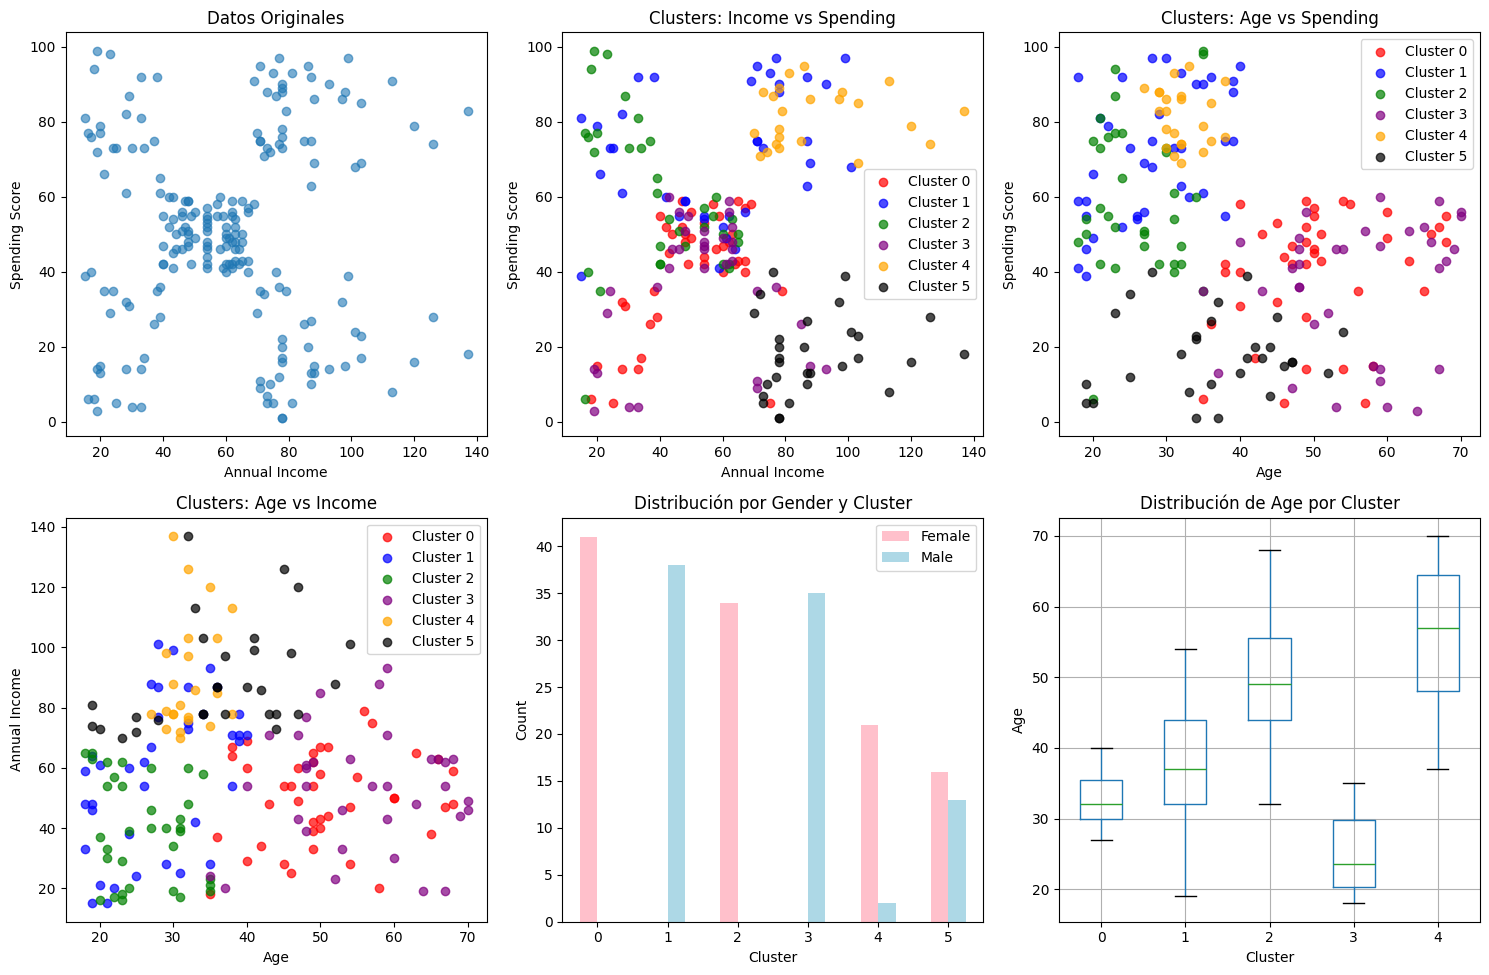

In [50]:
# Visualizar los resultados
plt.figure(figsize=(15, 10))

# Subplot 1: Income vs Spending Score
plt.subplot(2, 3, 1)
plt.scatter(df['AnnualIncome'], df['SpendingScore'], alpha=0.6)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Datos Originales')

# Subplot 2: Income vs Spending Score con clusters
plt.subplot(2, 3, 2)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']
for i in range(6):
    cluster_data = df[df['Cluster2'] == i]
    plt.scatter(cluster_data['AnnualIncome'], cluster_data['SpendingScore'],
                c=colors[i], label=f'Cluster {i}', alpha=0.7)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters: Income vs Spending')
plt.legend()

# Subplot 3: Age vs Spending Score con clusters
plt.subplot(2, 3, 3)
for i in range(6):
    cluster_data = df[df['Cluster2'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['SpendingScore'],
                c=colors[i], label=f'Cluster {i}', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Clusters: Age vs Spending')
plt.legend()

# Subplot 4: Age vs Income con clusters
plt.subplot(2, 3, 4)
for i in range(6):
    cluster_data = df[df['Cluster2'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['AnnualIncome'],
                c=colors[i], label=f'Cluster {i}', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Clusters: Age vs Income')
plt.legend()

# Subplot 5: Distribución por Gender y Cluster
plt.subplot(2, 3, 5)
gender_cluster = df.groupby(['Cluster2', 'GenderNum']).size().unstack(fill_value=0)
gender_cluster.plot(kind='bar', ax=plt.gca(), color=['pink', 'lightblue'])
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribución por Gender y Cluster')
plt.xticks(rotation=0)
plt.legend(['Female', 'Male'])

# Subplot 6: Box plot de Age por Cluster
plt.subplot(2, 3, 6)
df.boxplot(column='Age', by='Cluster', ax=plt.gca())
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Distribución de Age por Cluster')
plt.suptitle('')  # Quitar título automático

plt.tight_layout()
plt.show()